In [26]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('kunden_einkaufszentrum.csv')

C:\Users\astartz\AppData\Local\Temp\ipykernel_27244\747635566.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['AgeGroup', 'Gender']).size().unstack(fill_value=0)


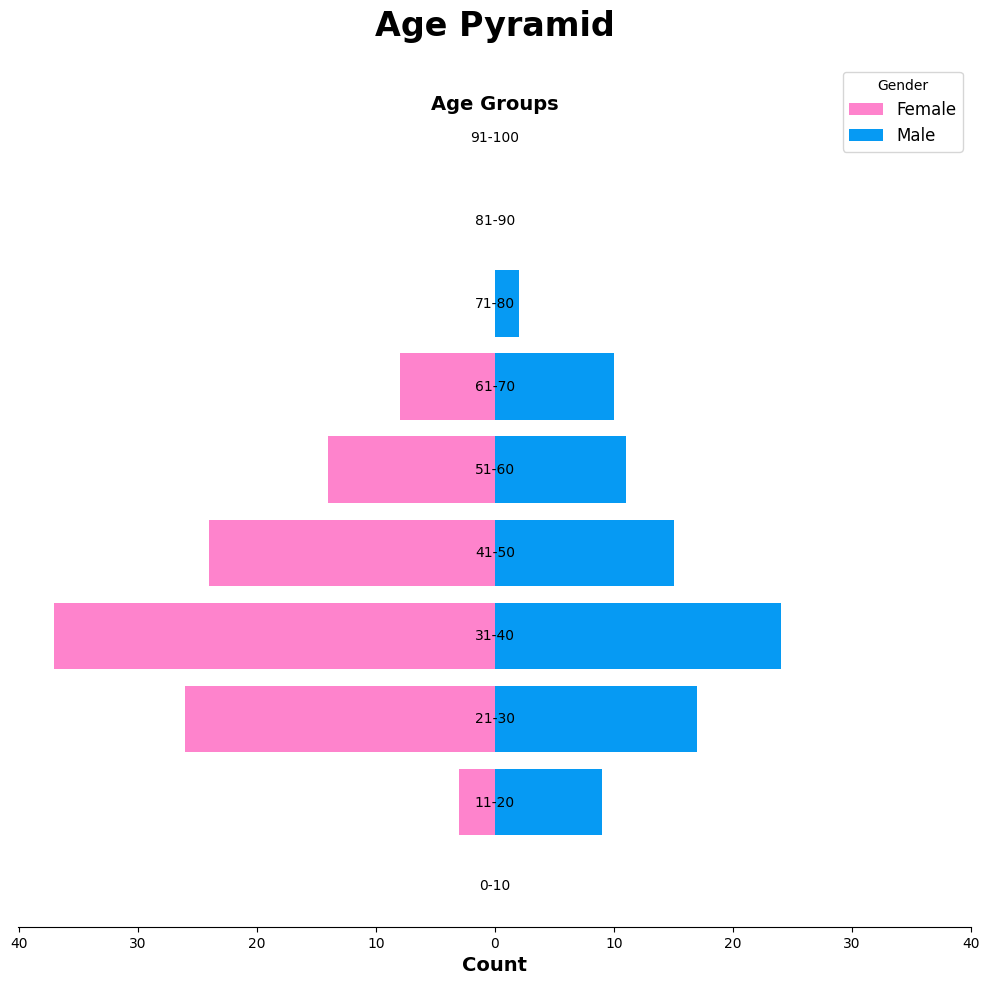

In [59]:
#Age Pyramide
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Datenvorbereitung
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Gruppierung nach Altersgruppen und Geschlecht
grouped_data = data.groupby(['AgeGroup', 'Gender']).size().unstack(fill_value=0)

# Daten für die Pyramide extrahieren
age_groups = labels 
group1 = grouped_data['Female'].values  
group2 = grouped_data['Male'].values    

# Positionen für die Altersgruppen
y = np.arange(len(age_groups)) + 0.5  

# Erstellung der Bevölkerungspyramide 
plt.figure(figsize=(10, 10))
plt.barh(y, -group1, color=['#fe83cc'], label='Female', align='center')  # Linke Gruppe
plt.barh(y, group2, color=['#069af3'], label='Male', align='center')      # Rechte Gruppe 

# Mittige Beschriftung der Altersgruppen
plt.xticks(np.arange(-40, 41, 10), fontsize=12)  # Zahlenstrahl von -40 bis 40 in 10er Schritten
plt.gca().set_xticklabels([abs(x) for x in plt.gca().get_xticks()]) 
plt.xlabel('Count', fontsize=14, fontweight='bold', color='black')
plt.title('Age Pyramid', fontsize=24, fontweight='bold', color='black', pad=20)

# Achsen anpassen, damit die y-Achse bei 0 auf der x-Achse startet und nach oben hin zunimmt
ax = plt.gca()
ax.spines['left'].set_color('none')  
ax.spines['left'].set_visible(False)  
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')  
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none') 

# Entferne die y-Achsenbeschriftungen
ax.set_yticklabels([])

# Mittige Beschriftung der Altersgruppen auf der unsichtbaren y-Achse
for i, age_group in enumerate(age_groups):
    plt.text(0, y[i], age_group, ha='center', va='center', fontsize=10)

# Füge den Text "Age Groups" zwischen der Überschrift und der letzten Zahlenbeschriftung ein
plt.text(0, max(y) + 0.4, 'Age Groups', ha='center', va='center', fontsize=14, fontweight='bold', color='black')

# Legende
plt.legend(title="Gender", loc="upper right", fontsize=12)

# Layout-Optimierung
plt.tight_layout()

# Diagramm anzeigen
plt.show()

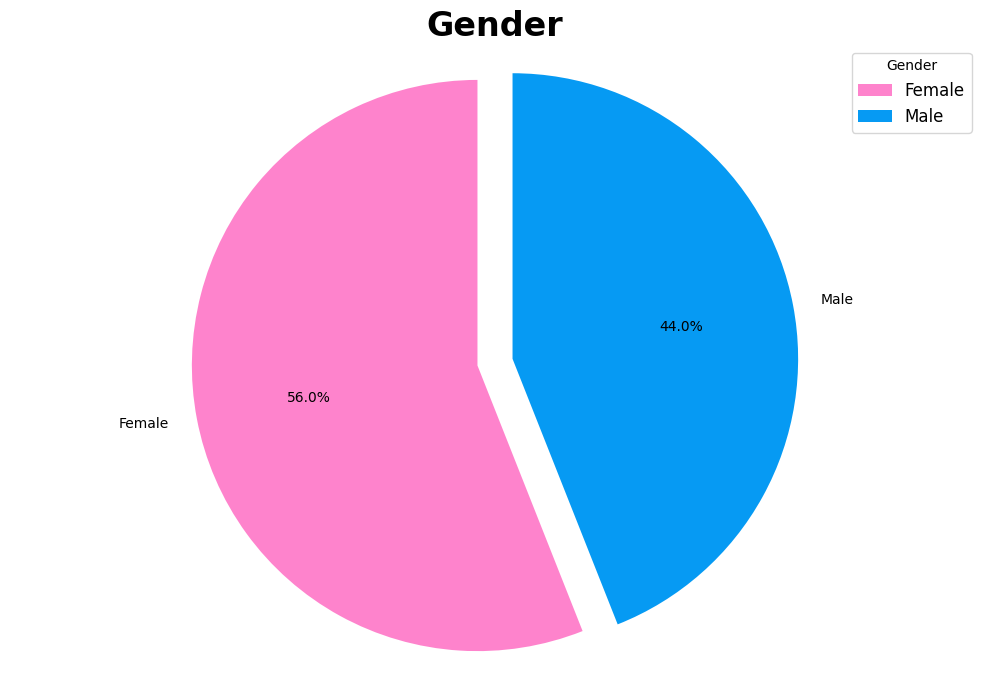

In [61]:
# Gender 


# Labels und Daten
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['#fe83cc', '#069af3']
explode = [0, 0.1]

# Einstellungen für die Darstellung
plt.figure(figsize=(10, 7))
plt.pie(
    size,
    colors=colors,
    explode=explode,
    labels=labels,
    shadow=False,  
    autopct='%.1f%%',  # Einfache Prozentanzeige mit 1 Dezimalstelle
    startangle=90, # Startwinkel für besseren Vergleich
    radius=0.8
)

# Titel und Legende
plt.title('Gender', fontsize=24, fontweight='bold', color='black')
plt.legend(title="Gender", loc="upper right", fontsize=12)
plt.axis('equal')  # Sicherstellen, dass der Kreis nicht verzerrt wird
plt.tight_layout()  # Optimierung der Abstände

# Graph anzeigen
plt.show()

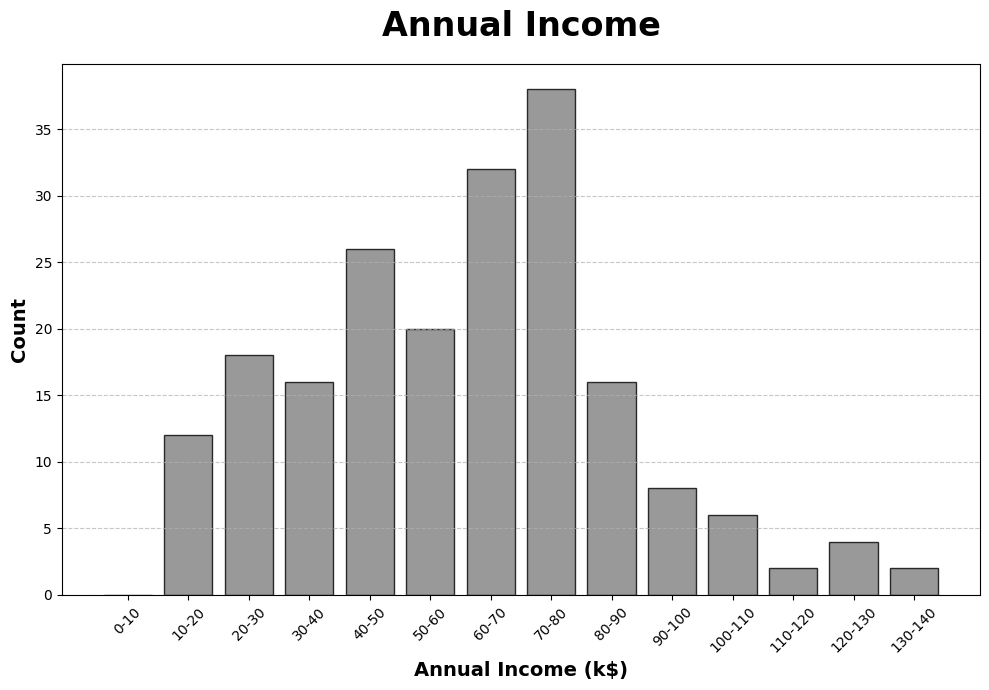

In [84]:
#Annual Income

import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
data = pd.read_csv('kunden_einkaufszentrum.csv')

# Intervalle für Annual Income in 10er-Schritten erstellen
income_bins = pd.interval_range(start=0, freq=10, end=data['Annual Income (k$)'].max() + 10, closed='left')

# Zuordnung der Einkommenswerte zu den Intervallen
data['IncomeGroup'] = pd.cut(data['Annual Income (k$)'], bins=income_bins)

# Häufigkeiten für jede Einkommensgruppe berechnen
income_group_counts = data['IncomeGroup'].value_counts().sort_index()

# Intervalle in das Format "0-10" umwandeln
formatted_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in income_group_counts.index]

# Erstellung des Balkendiagramms
plt.figure(figsize=(10, 7))
plt.bar(
    formatted_labels,  
    income_group_counts.values,
    color='grey',  
    edgecolor='black',
    width=0.8,
    alpha=0.8
)

# Achsentitel und Diagrammtitel
plt.xlabel('Annual Income (k$)', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='black')
plt.title('Annual Income', fontsize=24, fontweight='bold', color='black', pad=20)

# Anpassung der Achsen
plt.xticks(fontsize=10, rotation=45, color='black')
plt.yticks(fontsize=10, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Layout-Optimierung
plt.tight_layout()

# Diagramm anzeigen
plt.show()


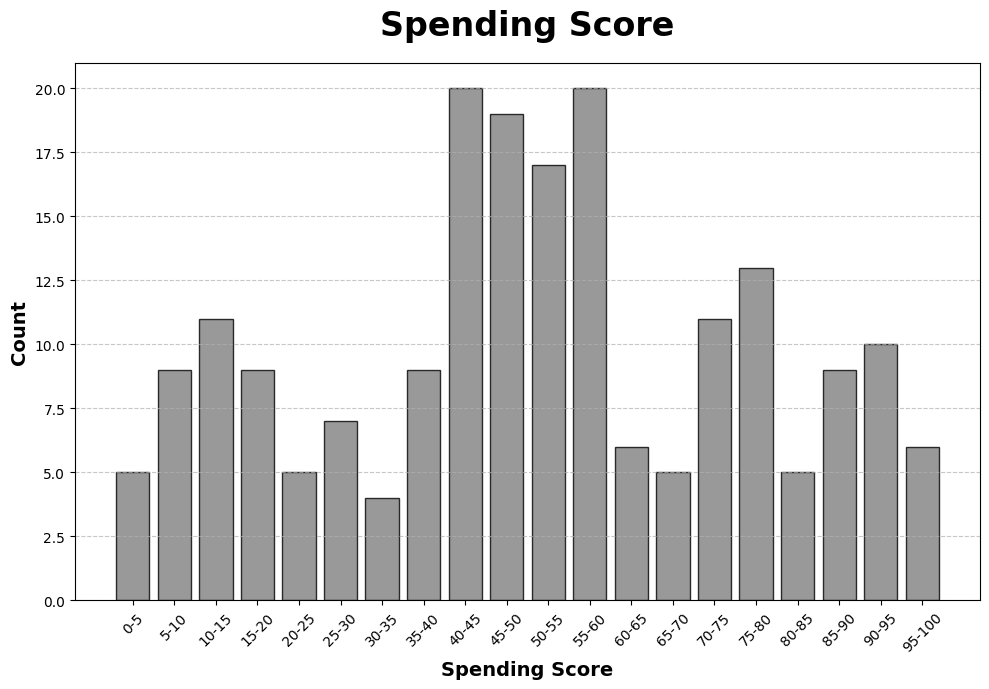

In [85]:
#Spending Score

import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
data = pd.read_csv('kunden_einkaufszentrum.csv')

# Intervalle für Spending Score in 5er-Schritten erstellen
spending_bins = pd.interval_range(start=0, freq=5, end=data['Spending Score (1-100)'].max() + 5, closed='left')

# Zuordnung der Werte zu den Intervallen
data['SpendingGroup'] = pd.cut(data['Spending Score (1-100)'], bins=spending_bins)

# Häufigkeiten für jede Spending Score Gruppe berechnen
spending_group_counts = data['SpendingGroup'].value_counts().sort_index()

# Intervalle in das Format "0-5" umwandeln
formatted_spending_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in spending_group_counts.index]

# Erstellung des Balkendiagramms
plt.figure(figsize=(10, 7))
plt.bar(
    formatted_spending_labels,  # Formatierte Intervalle als x-Achse-Beschriftung
    spending_group_counts.values,
    color='grey',  # Einheitliche Farbgestaltung
    edgecolor='black',
    width=0.8,
    alpha=0.8
)

# Achsentitel und Diagrammtitel
plt.xlabel('Spending Score', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='black')
plt.title('Spending Score', fontsize=24, fontweight='bold', color='black', pad=20)

# Anpassung der Achsen
plt.xticks(fontsize=10, rotation=45, color='black')  # Schriftgröße der x-Achse
plt.yticks(fontsize=10, color='black')  # Schriftgröße der y-Achse
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Layout-Optimierung
plt.tight_layout()

# Diagramm anzeigen
plt.show()
